In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
# !pip install mplfinance
import mplfinance as mpf
import datetime as dt
import seaborn as sns

In [6]:
# Variables
metric = 'Adj Close'
currency = 'USD'
start = dt.datetime(2018, 1, 1)
end = dt.datetime.today()
coins = ['BTC', 'ETH', 'ADA', 'BNB', 'LTC', 'LINK', 'DASH', 'DOGE', 'MIOTA', 'DOT1', 'XRP', 'XLM']
column_names = []


In [7]:
first = True

for ticker in coins:
  data = web.DataReader(f'{ticker}-{currency}', 'yahoo', start, end)
  if first:
    combined = data[[metric]].copy()
    column_names.append(ticker)
    combined.columns = column_names
    first = False
  else:
    combined = combined.join(data[metric])
    column_names.append(ticker)
    combined.columns = column_names

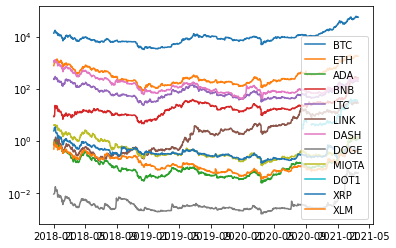

In [8]:
plt.yscale('log')

for ticker in coins:
  plt.plot(combined[ticker], label=ticker)

plt.legend(loc=0)
plt.show()

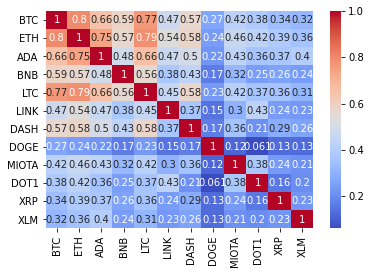

In [9]:
combined = combined.pct_change().corr(method='pearson')

sns.heatmap(combined, annot=True, cmap='coolwarm')
